# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

### Now take a look at the shapes of the X and y matricies 

In [2]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [3]:
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [47]:
type(X[2])

numpy.ndarray

In [5]:
X[36000]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

In [6]:
import matplotlib.pyplot as plt

plt.imshow(X[36000].reshape(28,28) , cmap = plt.cm.binary, interpolation="nearest")

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [7]:
y[36000]

'9'

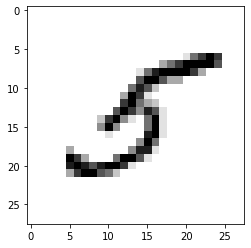

In [8]:
plt.imshow(X[35].reshape(28,28) , cmap = plt.cm.binary, interpolation="nearest")

In [9]:
y[35]

'5'

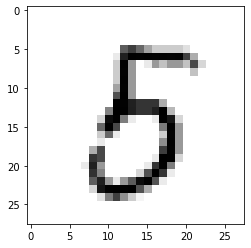

In [12]:
plt.imshow(X_test[45].reshape(28,28) , cmap = plt.cm.binary, interpolation="nearest")

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [11]:
X_train = X[:60000,:]
X_test = X[60000:,:]
y_train = y[:60000]
y_test = y[60000:]

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [13]:
y_train_5s = np.where(y_train == '5', '5', '0')
y_test_5s = np.where(y_test == '5', '5', '0')

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [14]:
from sklearn.linear_model import LogisticRegression

log_model_5s = LogisticRegression(random_state=0, solver='lbfgs',multi_class='ovr')

log_model_5s.fit(X_train, y_train_5s)

/Users/abreualberto91/anaconda3/envs/ironhack/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

### Does the classifier predict correctly the 36000th digit we picked before?

In [15]:
y_pred_test = log_model_5s.predict(X_train)

In [16]:
y_pred_test[36000] #The model predict the 36000th value correctly

'0'

In [17]:
#I look for a 5 in the X test and see if the model can predicted it.

In [18]:
y_pred = log_model_5s.predict(X_test)

In [19]:
y_pred[45] #The model predict the 5 correctly

'5'

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [20]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [21]:
never_5_clf.fit(X_train, y_test_5s)

In [22]:
y_pred_no_5s = never_5_clf.predict(X_test)


In [23]:
y_pred_no_5s

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [24]:
y_pred_no_5s

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [25]:
y_pred_no_5s_bin = np.where(y_pred_no_5s == True, '5', '0')

In [26]:
never_5_pred = np.where(y_pred_no_5s == True, 1, 0)

In [27]:
never_5_pred = y_pred_no_5s.flatten()
never_5_pred.shape

(10000,)

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [33]:
#Confusion matrix with the bad model "never_5_clf = Never5Classifier()"

In [34]:
conf_matrix_bad = confusion_matrix(y_pred_no_5s_bin, y_pred)

In [35]:
conf_matrix_bad

array([[9181,  819],
       [   0,    0]])

In [38]:
print ('Accuracy:', accuracy_score(y_pred_no_5s_bin, y_pred))
print ('F1 score:', f1_score(y_pred_no_5s_bin, y_pred, average="binary", pos_label= "5"))
print ('Recall:', recall_score(y_pred_no_5s_bin, y_pred, average="binary", pos_label= "5"))
print ('Precision:', precision_score(y_pred_no_5s_bin, y_pred, average="binary", pos_label= "5"))
print ('\n confussion matrix:\n',confusion_matrix(y_pred_no_5s_bin, y_pred))

Accuracy: 0.9181
F1 score: 0.0
Recall: 0.0
Precision: 0.0

 confussion matrix:
 [[9181  819]
 [   0    0]]


/Users/abreualberto91/anaconda3/envs/ironhack/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/Users/abreualberto91/anaconda3/envs/ironhack/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


In [39]:
# Applying it on the good model "log_model_5s = LogisticRegression(random_state=0, 
# solver='lbfgs',multi_class='ovr')"

In [40]:
y_pred

array(['0', '0', '0', ..., '0', '5', '0'], dtype='<U1')

In [41]:
y_test

array(['7', '2', '1', ..., '4', '5', '6'], dtype=object)

In [42]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test_5s, y_pred)

In [43]:
conf_matrix

array([[9034,   74],
       [ 147,  745]])

In [44]:
score = log_model_5s.score(X_test,y_test_5s )
print(score)

0.9779


In [45]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score

print ('Accuracy:', accuracy_score(y_test_5s, y_pred))
print ('F1 score:', f1_score(y_test_5s, y_pred, average="binary", pos_label= "5"))
print ('Recall:', recall_score(y_test_5s, y_pred, average="binary", pos_label= "5"))
print ('Precision:', precision_score(y_test_5s, y_pred, average="binary", pos_label= "5"))
print ('\n confussion matrix:\n',confusion_matrix(y_test_5s, y_pred))

Accuracy: 0.9779
F1 score: 0.8708357685563999
Recall: 0.8352017937219731
Precision: 0.9096459096459096

 confussion matrix:
 [[9034   74]
 [ 147  745]]


### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [ ]:
#First model
"""Accuracy: 0.9181
F1 score: 0.0
Recall: 0.0
Precision: 0.0

 confussion matrix:
 [[9181  819]
 [   0    0]]"""

#Second model
"""Accuracy: 0.9779
F1 score: 0.8708357685563999
Recall: 0.8352017937219731
Precision: 0.9096459096459096

 confussion matrix:
 [[9034   74]
 [ 147  745]]"""

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

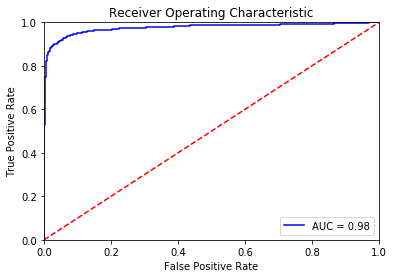

In [46]:
from sklearn import metrics

probs = log_model_5s.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_5s, preds, pos_label = "5")
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [ ]:
fpr, tpr, thresholds = roc_curve(y_pred, never_5_pred)
# we are looking for the performance of the y_5 test and the never 5 prediciton therefore those are our variables
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)

# Plotting the worse case line, dotted line, that is where the outcome is decided randomly 
plt.plot([0, 1], [0, 1],'r--')

# Setting aesthetics of the plot 
plt.legend(loc = 'lower right')
plt.title('ROC Curve for Logistic Regression')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

### Now find the roc_auc_score for each. 

### What does this metric tell you? Which classifier works better with this metric in mind?